# <font color = blue > <span style='font-family:Georgia'> Telecom Churn Case Study </span> </font>    

## <font color = Green > <span style='font-family:Georgia'> Business Problem Overview: </span> </font>    
        
- **Telecom Industry Dynamics:** Intense competition leads to high annual churn rates of 15-25%.
- **Cost Implications:** It's 5-10 times more expensive to acquire new customers than retain existing ones.
- **Business Priority:** Retaining high-profit customers is the primary goal for many incumbent operators.
- **Project Objective:** Analyze customer data to predict churn risk and identify key indicators for proactive retention efforts.

## <font color = Green > <span style='font-family:Georgia'> Payment Models, Churn and Focus: </span> </font>    

- **Payment Models:** Telecom industry operates on postpaid and prepaid payment models.
- **Churn Definition:** Churn is straightforward in postpaid where customers terminate services, but complex in prepaid where usage cessation doesn't necessarily mean churn.
- **Prepaid Challenges:** Predicting churn is particularly challenging in prepaid due to usage variability and temporary service discontinuations.
- **Market Focus:** This project focuses on the Indian and Southeast Asian markets where prepaid is prevalent.
        
## <font color = Green > <span style='font-family:Georgia'> Types of Churn: </span> </font>    

- **Revenue-based Churn:** Identifies customers who haven't utilized revenue-generating services, but overlooks those who receive calls/SMSes without generating revenue.
- **Usage-based Churn:** Flags customers with zero usage, but may not provide timely insights for retention if defined over a prolonged period.
- **Project Approach:** Adopts the usage-based churn definition for timely intervention and retention efforts.
        
## <font color = Green > <span style='font-family:Georgia'> Business Goal: </span> </font>    

- **High-Value Churn:** High-value churn refers to the loss of customers who contribute significantly to revenue in the Indian and Southeast Asian markets. These customers, often comprising the top 20% based on a specific metric, are crucial for revenue generation.
- **Business Goal**: The business goal is to minimize revenue loss by reducing churn specifically among high-value customers. This entails identifying these customers based on predefined metrics and implementing strategies to retain them, thus mitigating revenue leakage.

In [1]:
# Data Analysis & Data wrangling
import numpy as np
import pandas as pd

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import regex

In [3]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

## <font color = blue > <span style='font-family:Georgia'> Step 1: Reading and Understanding the Data </span> </font>

In [4]:
# Get the dataset
telecom = pd.read_csv("telecom_churn_data.csv")

In [5]:
#check the data
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [6]:
print("Rows:",telecom.shape[0], "Columns:",telecom.shape[1])

Rows: 99999 Columns: 226


In [7]:
#Check the metadata with verbose( Show all the column names)
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# segregation of data

#Categorcial columns separation
date_columns = [col for col in telecom.columns if telecom[col].dtype =="object"]    
print(f"Total Categorical columns:{len(date_columns)}")

#ID columns separation
id_columns = ["mobile_number","circle_id"]  # total ID columns are 2 
print(f"Total numeric columns:{len(id_columns)}")

#Numeric columns separation
numeric_columns = [ col for col in telecom.columns if col not in date_columns + id_columns]    
print(f"Total numeric columns:{len(numeric_columns)}")  

Total Categorical columns:12
Total numeric columns:2
Total numeric columns:212


In [9]:
#check the date columns
telecom[date_columns].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [10]:
print(telecom['last_date_of_month_6'].value_counts(dropna=False,normalize=True))
print(telecom['last_date_of_month_7'].value_counts(dropna=False,normalize=True))
print(telecom['last_date_of_month_8'].value_counts(dropna=False,normalize=True))
print(telecom['last_date_of_month_9'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_6'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_7'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_8'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_9'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_data_6'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_data_7'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_data_8'].value_counts(dropna=False,normalize=True))
print(telecom['date_of_last_rech_data_9'].value_counts(dropna=False,normalize=True))

6/30/2014    1.0
Name: last_date_of_month_6, dtype: float64
7/31/2014    0.99399
NaN          0.00601
Name: last_date_of_month_7, dtype: float64
8/31/2014    0.989
NaN          0.011
Name: last_date_of_month_8, dtype: float64
9/30/2014    0.98341
NaN          0.01659
Name: last_date_of_month_9, dtype: float64
6/30/2014    0.169602
6/29/2014    0.129181
6/27/2014    0.111691
6/28/2014    0.094911
6/26/2014    0.055301
6/25/2014    0.048960
6/17/2014    0.041450
6/24/2014    0.041290
6/14/2014    0.038450
6/21/2014    0.037470
6/23/2014    0.029080
6/18/2014    0.027470
6/12/2014    0.025110
6/22/2014    0.023440
6/13/2014    0.021470
6/19/2014    0.020090
6/20/2014    0.018030
NaN          0.016070
6/16/2014    0.011260
6/15/2014    0.008730
6/11/2014    0.005790
6/8/2014     0.005200
6/5/2014     0.003270
6/7/2014     0.003220
6/10/2014    0.002830
6/3/2014     0.002330
6/1/2014     0.002180
6/9/2014     0.001990
6/6/2014     0.001730
6/4/2014     0.001310
6/2/2014     0.001090
Name: d

#### **As per the above information, below are few columns that can be removed:**
    - last_date_of_month_6 - Only has one value
    - last_date_of_month_7 - Majority has only one value
    - last_date_of_month_8 - Majority has only one value
    - last_date_of_month_9 - Majority of the data is last day of the month
    - date_of_last_rech_data_6 - most of the data fields are blank
    - date_of_last_rech_data_7 - most of the data fields are blank
    - date_of_last_rech_data_8 - most of the data fields are blank
    - date_of_last_rech_data_9 - most of the data fields are blank
    - date_of_last_rech_6 - dropping Last recharge of corresponding month
    - date_of_last_rech_7 - dropping Last recharge of corresponding month
    - date_of_last_rech_8 - dropping Last recharge of corresponding month
    - date_of_last_rech_9 - dropping Last recharge of corresponding month

### Missing values and Initial data analysis

In [11]:
#check the Null values column wise
(telecom.isnull().sum()/len(telecom)).sort_values(ascending = False)

arpu_3g_6            0.748467
night_pck_user_6     0.748467
total_rech_data_6    0.748467
arpu_2g_6            0.748467
max_rech_data_6      0.748467
                       ...   
max_rech_amt_7       0.000000
max_rech_amt_6       0.000000
total_rech_amt_9     0.000000
total_rech_amt_8     0.000000
sep_vbc_3g           0.000000
Length: 226, dtype: float64

In [12]:
telecom[telecom["total_rech_data_6"].isna() & telecom["date_of_last_rech_data_6"].isna()][ \
    ["date_of_last_rech_data_6","total_rech_data_6","max_rech_data_6","max_rech_data_6","av_rech_amt_data_6"]]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,max_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
99991,NaN,NaN,NaN,NaN,NaN
99992,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN
99994,NaN,NaN,NaN,NaN,NaN


In [13]:
# Columns which we have to impute as Zero.
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# Put zero in these columns
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

#### Below columns are imputed with zeros.
- Total Recharge data in month 6,7,8,9 
- Maximum Recharge Data in Month 6,7,8 ,9
- Average Amount recharge Data in Month 6,7,8,9,


In [14]:
telecom.drop(columns=id_columns,inplace=True)
telecom.drop(columns=date_columns,inplace=True)

In [15]:
month_6_col = [col for col in telecom.columns if "_6" in col]
print(len(month_6_col))
month_6_col

51


['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

In [16]:
telecom[month_6_col].head(10)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,...,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,35.39,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,60.66,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,183.03,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,261.636,50.31,76.96,0.00,0.00,50.31,67.64,0.00,0.00,117.96,...,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0
5,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,66.56,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
6,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,333.64,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
9,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,71.93,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


In [17]:
((telecom.isnull().sum()/len(telecom)*100)).sort_values(ascending = False).head(50)

count_rech_2g_6     74.846748
night_pck_user_6    74.846748
fb_user_6           74.846748
arpu_2g_6           74.846748
arpu_3g_6           74.846748
count_rech_3g_6     74.846748
count_rech_2g_7     74.428744
count_rech_3g_7     74.428744
night_pck_user_7    74.428744
arpu_3g_7           74.428744
arpu_2g_7           74.428744
fb_user_7           74.428744
night_pck_user_9    74.077741
arpu_3g_9           74.077741
count_rech_3g_9     74.077741
fb_user_9           74.077741
arpu_2g_9           74.077741
count_rech_2g_9     74.077741
arpu_3g_8           73.660737
arpu_2g_8           73.660737
night_pck_user_8    73.660737
count_rech_2g_8     73.660737
fb_user_8           73.660737
count_rech_3g_8     73.660737
std_og_mou_9         7.745077
std_og_t2c_mou_9     7.745077
loc_ic_t2t_mou_9     7.745077
isd_og_mou_9         7.745077
std_og_t2f_mou_9     7.745077
og_others_9          7.745077
std_ic_t2t_mou_9     7.745077
loc_ic_t2m_mou_9     7.745077
loc_ic_t2f_mou_9     7.745077
loc_ic_mou

**Night pack user columns and FB User columns are categorical column.**
- night_pck_user_6    
- night_pck_user_7    
- night_pck_user_8    
- night_pck_user_9
- fb_user_6           
- fb_user_7           
- fb_user_8           
- fb_user_9

In [18]:
# Check night_pck_user unique values in month 6
telecom["night_pck_user_6"].unique()

array([ 0., nan,  1.])

In [19]:
#Check the percetages null values of these columns
categorical_columns = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6",          
"fb_user_7",          
"fb_user_8",           
"fb_user_9"]

telecom[categorical_columns].isna().sum()/len(telecom)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

**imputing the NaN as -1 , as a part to mark as missing value.**

In [20]:
#Fill NaN value as -1 to mark missing value
telecom[categorical_columns] = telecom[categorical_columns].fillna(-1)

In [21]:
# Check if the null value is filled with -1
telecom[categorical_columns].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

**There are no null values in night_pck_user and fb_user columns**

In [22]:
#Check the null value pecentage
((telecom.isna().sum()/len(telecom))*100).sort_values(ascending=False)

arpu_3g_6           74.846748
count_rech_3g_6     74.846748
count_rech_2g_6     74.846748
arpu_2g_6           74.846748
arpu_3g_7           74.428744
                      ...    
total_ic_mou_8       0.000000
total_ic_mou_9       0.000000
total_rech_num_6     0.000000
total_rech_num_7     0.000000
sep_vbc_3g           0.000000
Length: 212, dtype: float64

In [23]:
# Dropping columns were majority of the data is null (50% and above)
def columns_tobe_dropped(cols):
    '''cols: list of columns in dataframe
      '''
    for col in cols:
        if (telecom[col].isna().sum()/len(telecom)) > .50:   # Check the condition if null values GT .50
            telecom.drop(columns=[col],inplace=True)

In [24]:
# drop colums 
columns_tobe_dropped(telecom.columns)

In [25]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(163), int64(33)
memory usage: 149.5 MB


Removed 30 columns from the dataframe 

In [26]:
# check the null value row wise.
telecom.isna().sum(axis=1).sort_values(ascending = False).head(30)

51296    119
47936    119
48177    119
48376    119
48474    119
48582    119
48651    119
48707    119
48740    119
48839    119
49153    119
49211    119
49582    119
49594    119
49651    119
49772    119
49857    119
49903    119
49909    119
49981    119
50006    119
48138    119
47786    119
45426    119
47739    119
45836    119
46033    119
46295    119
46515    119
46694    119
dtype: int64

In [27]:
# check the null value again
((telecom.isna().sum()/len(telecom))*100).sort_values(ascending = False)

std_ic_t2t_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
loc_og_mou_9          7.745077
                        ...   
last_day_rch_amt_7    0.000000
last_day_rch_amt_6    0.000000
max_rech_amt_9        0.000000
max_rech_amt_8        0.000000
sep_vbc_3g            0.000000
Length: 196, dtype: float64

In [28]:
#checking unique value count
zero_variance_columns = pd.DataFrame(telecom.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(zero_variance_columns[zero_variance_columns['nunique'] == 1])

              feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1


- The above columns have just one Unique value.
- Hence they have zero variance and can be dropped.

In [29]:
# create columns list with zero variance i:e 1 unique value.
columns_tobe_dropped = list(zero_variance_columns[zero_variance_columns['nunique'] == 1]["feature"])
columns_tobe_dropped

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [30]:
# drop columns whish are having 1 unique values
telecom.drop(columns=columns_tobe_dropped,inplace=True)

In [31]:
#check the shape
print("Rows:",telecom.shape[0], "Columns:",telecom.shape[1])

Rows: 99999 Columns: 185


In [32]:
# Check the null values again
(telecom.isna().sum()/len(telecom)).sort_values(ascending=False).reset_index()

,index,0
0,loc_ic_mou_9,0.077451
1,loc_og_mou_9,0.077451
2,std_ic_t2t_mou_9,0.077451
3,loc_og_t2m_mou_9,0.077451
4,loc_ic_t2t_mou_9,0.077451
...,...,...
180,last_day_rch_amt_6,0.000000
181,max_rech_amt_9,0.000000
182,max_rech_amt_8,0.000000
183,max_rech_amt_7,0.000000


- We still have 107 columns which are null.
- Minitue of Usage columns are the ones with null values 
- Imputing those values as 0 instead of iteratively imputing.

In [33]:
# Fill null as zero.
telecom = telecom.fillna(0)

In [34]:
telecom.isna().sum()

arpu_6         0
arpu_7         0
arpu_8         0
arpu_9         0
onnet_mou_6    0
              ..
aon            0
aug_vbc_3g     0
jul_vbc_3g     0
jun_vbc_3g     0
sep_vbc_3g     0
Length: 185, dtype: int64

In [35]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 185 entries, arpu_6 to sep_vbc_3g
dtypes: float64(152), int64(33)
memory usage: 141.1 MB


- Removed nulls
- row count untouched
- columns reduced to from 226 to 185 

### Filter High Value Customer

In [36]:
# Calculate total Data recharge amount = Total Data Recharge * Average Amount of Data recharge

telecom["total_data_recharge_amnt_6"] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom["total_data_recharge_amnt_7"] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [37]:
# Calculate Total Amount recharge = total talktime recharge + total data recharge

telecom["total_recharge_amnt_6"] = telecom.total_rech_amt_6 + telecom.total_data_recharge_amnt_6
telecom["total_recharge_amnt_7"] = telecom.total_rech_amt_7 + telecom.total_data_recharge_amnt_7

In [38]:
# Calculate Average amount of recharge of 6th and 7th month

telecom['average_amnt_6_7'] = (telecom["total_recharge_amnt_6"] + telecom["total_recharge_amnt_7"])/2

In [39]:
# Check the 70th percentile of "average_amnt_6_7"

telecom['average_amnt_6_7'].quantile(.70)

478.0

- 70th percentile of average amount recharge in 6th and 7th month comes as 478
- Now we need to filter the data based on this value.

In [40]:
# filter based on 70th percentile

telecom_highvalue = telecom[telecom["average_amnt_6_7"]>= telecom["average_amnt_6_7"].quantile(.70)]

In [41]:
# Delete the derived columns created in above step

telecom_highvalue.drop(columns=["total_data_recharge_amnt_6","total_data_recharge_amnt_7","total_recharge_amnt_6",\
                                "total_recharge_amnt_7","average_amnt_6_7"],inplace=True)

In [42]:
print("Rows:",telecom_highvalue.shape[0], "Columns:",telecom_highvalue.shape[1]) 

Rows: 30001 Columns: 185


In [43]:
# check the data

telecom_highvalue.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,...,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,...,0,-1.0,1.0,1.0,-1.0,315,21.03,910.65,122.16,0.00
21,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,...,0,-1.0,-1.0,-1.0,-1.0,720,0.00,0.00,0.00,0.00
23,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,89.36,...,0,-1.0,1.0,1.0,1.0,604,40.45,51.86,0.00,0.00


# Tag churners and remove attributes of the churn phase

- churning customers based on the fourth month (churn=1, else 0) 
- Those who have not made any calls or used mobile internet even once are in the churn phase.
- Below attributes need to be analysed to filter churners
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [44]:
#Calculate total call in mins by adding Incoming and Outgoing calls

telecom_highvalue['total_calls_9'] = telecom_highvalue.total_ic_mou_9 + telecom_highvalue.total_og_mou_9
print(telecom_highvalue['total_calls_9'])

0           0.00
7           0.00
8         177.09
21       1284.14
23        255.11
          ...   
99981     455.84
99984     163.70
99986    1642.35
99988     448.00
99997       2.21
Name: total_calls_9, Length: 30001, dtype: float64


In [45]:
# Calculate total 2G and 3G consumption of data

telecom_highvalue["total_data_consumptions"] = telecom_highvalue.vol_2g_mb_9 + telecom_highvalue.vol_3g_mb_9
print(telecom_highvalue["total_data_consumptions"])

0           0.00
7           0.00
8           0.00
21          0.00
23        328.67
          ...   
99981       0.00
99984     955.97
99986     950.62
99988     393.39
99997    4262.81
Name: total_data_consumptions, Length: 30001, dtype: float64


In [46]:
telecom_highvalue["churn"]=telecom_highvalue.apply(lambda row:1 if (row.total_calls_9==0 and row.total_data_consumptions==0) else 0,axis=1)

In [47]:
telecom_highvalue["churn"].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

- **The churn rate is approximately 8%, while the non-churn rate is close to 92%.**

- **The data exhibits an imbalance.**


In [48]:
#Drop the derived columns

telecom_highvalue.drop(columns=["total_calls_9","total_data_consumptions"],inplace=True)

In [49]:
# drop all 9th month columns

telecom_highvalue = telecom_highvalue.filter(regex='[^9]$',axis=1)

In [50]:
# check the baisc info about high value customer

telecom_highvalue.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

## <font color = blue > <span style='font-family:Georgia'> Step 2: Exploratory Data Analysis

In [51]:
# Check the percenatges of churn and non-churn customers

telecom_highvalue["churn"].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

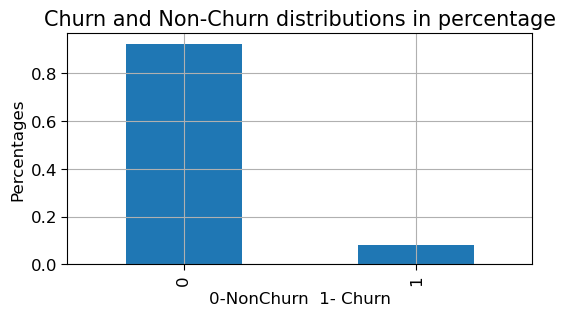

In [52]:
# Plot to Check percetanges of churn and non churn data
plt.figure(figsize=(6,3))
telecom_highvalue["churn"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=4,labelsize = 12) 
plt.title("Churn and Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=12)
plt.xlabel("0-NonChurn  1- Churn",fontsize=12)
plt.grid(0.3)
plt.show()

In [53]:
# Check basic statistics
telecom_highvalue.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,...,0.202393,0.075997,0.092597,0.008833,1209.368754,169.138860,178.872765,158.523962,8.029788,0.081364
std,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,76.302156,...,1.100107,0.976332,0.973118,0.972260,957.677989,420.974354,443.544138,416.734860,52.378232,0.273398
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,71.610000,69.910000,46.740000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,0.000000,...,0.000000,1.000000,1.000000,0.000000,846.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1756.000000,128.800000,137.290000,98.440000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,1.000000


In [54]:
# Check columns associated with month 6 to figure out how the columns and data are in other months

cols = [col for col in telecom_highvalue.columns if "_6" in col]
cols

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6']

### Derive new features by comparing month 8 features vs month 6 features and month 7 features.

In [55]:
# compare average revenue and calculate the difference
telecom_highvalue['arpu_diff'] = telecom_highvalue.arpu_8 - ((telecom_highvalue.arpu_6 + telecom_highvalue.arpu_7)/2)
print(telecom_highvalue['arpu_diff'])

0           7.7025
7        1961.9650
8        -298.1100
21         81.6570
23        232.8425
           ...    
99981      73.6135
99984    -147.0730
99986      14.2335
99988     -10.6650
99997     293.6285
Name: arpu_diff, Length: 30001, dtype: float64


In [56]:
# Check various columns related to Minutes of Usage and calculate difference

telecom_highvalue['onnet_mou_diff'] = telecom_highvalue.onnet_mou_8 - ((telecom_highvalue.onnet_mou_6 + telecom_highvalue.onnet_mou_7)/2)
telecom_highvalue['offnet_mou_diff'] = telecom_highvalue.offnet_mou_8 - ((telecom_highvalue.offnet_mou_6 + telecom_highvalue.offnet_mou_7)/2)
telecom_highvalue['roam_ic_mou_diff'] = telecom_highvalue.roam_ic_mou_8 - ((telecom_highvalue.roam_ic_mou_6 + telecom_highvalue.roam_ic_mou_7)/2)
telecom_highvalue['roam_og_mou_diff'] = telecom_highvalue.roam_og_mou_8 - ((telecom_highvalue.roam_og_mou_6 + telecom_highvalue.roam_og_mou_7)/2)
telecom_highvalue['loc_og_mou_diff'] = telecom_highvalue.loc_og_mou_8 - ((telecom_highvalue.loc_og_mou_6 + telecom_highvalue.loc_og_mou_7)/2)
telecom_highvalue['std_og_mou_diff'] = telecom_highvalue.std_og_mou_8 - ((telecom_highvalue.std_og_mou_6 + telecom_highvalue.std_og_mou_7)/2)
telecom_highvalue['isd_og_mou_diff'] = telecom_highvalue.isd_og_mou_8 - ((telecom_highvalue.isd_og_mou_6 + telecom_highvalue.isd_og_mou_7)/2)
telecom_highvalue['spl_og_mou_diff'] = telecom_highvalue.spl_og_mou_8 - ((telecom_highvalue.spl_og_mou_6 + telecom_highvalue.spl_og_mou_7)/2)
telecom_highvalue['total_og_mou_diff'] = telecom_highvalue.total_og_mou_8 - ((telecom_highvalue.total_og_mou_6 + telecom_highvalue.total_og_mou_7)/2)
telecom_highvalue['loc_ic_mou_diff'] = telecom_highvalue.loc_ic_mou_8 - ((telecom_highvalue.loc_ic_mou_6 + telecom_highvalue.loc_ic_mou_7)/2)
telecom_highvalue['std_ic_mou_diff'] = telecom_highvalue.std_ic_mou_8 - ((telecom_highvalue.std_ic_mou_6 + telecom_highvalue.std_ic_mou_7)/2)
telecom_highvalue['isd_ic_mou_diff'] = telecom_highvalue.isd_ic_mou_8 - ((telecom_highvalue.isd_ic_mou_6 + telecom_highvalue.isd_ic_mou_7)/2)
telecom_highvalue['spl_ic_mou_diff'] = telecom_highvalue.spl_ic_mou_8 - ((telecom_highvalue.spl_ic_mou_6 + telecom_highvalue.spl_ic_mou_7)/2)
telecom_highvalue['total_ic_mou_diff'] = telecom_highvalue.total_ic_mou_8 - ((telecom_highvalue.total_ic_mou_6 + telecom_highvalue.total_ic_mou_7)/2)


In [57]:
# Check total Recharge number, total recharge amount, max recharge amount, total recharge data, max recharge data, average recharge amount in Data, data consumption difference in MB

telecom_highvalue['total_rech_num_diff'] = telecom_highvalue.total_rech_num_8 - ((telecom_highvalue.total_rech_num_6 + telecom_highvalue.total_rech_num_7)/2)
telecom_highvalue['total_rech_amt_diff'] = telecom_highvalue.total_rech_amt_8 - ((telecom_highvalue.total_rech_amt_6 + telecom_highvalue.total_rech_amt_7)/2)
telecom_highvalue['max_rech_amt_diff'] = telecom_highvalue.max_rech_amt_8 - ((telecom_highvalue.max_rech_amt_6 + telecom_highvalue.max_rech_amt_7)/2)
telecom_highvalue['total_rech_data_diff'] = telecom_highvalue.total_rech_data_8 - ((telecom_highvalue.total_rech_data_6 + telecom_highvalue.total_rech_data_7)/2)
telecom_highvalue['max_rech_data_diff'] = telecom_highvalue.max_rech_data_8 - ((telecom_highvalue.max_rech_data_6 + telecom_highvalue.max_rech_data_7)/2)
telecom_highvalue['av_rech_amt_data_diff'] = telecom_highvalue.av_rech_amt_data_8 - ((telecom_highvalue.av_rech_amt_data_6 + telecom_highvalue.av_rech_amt_data_7)/2)
telecom_highvalue['vol_2g_mb_diff'] = telecom_highvalue.vol_2g_mb_8 - ((telecom_highvalue.vol_2g_mb_6 + telecom_highvalue.vol_2g_mb_7)/2)
telecom_highvalue['vol_3g_mb_diff'] = telecom_highvalue.vol_3g_mb_8 - ((telecom_highvalue.vol_3g_mb_6 + telecom_highvalue.vol_3g_mb_7)/2)

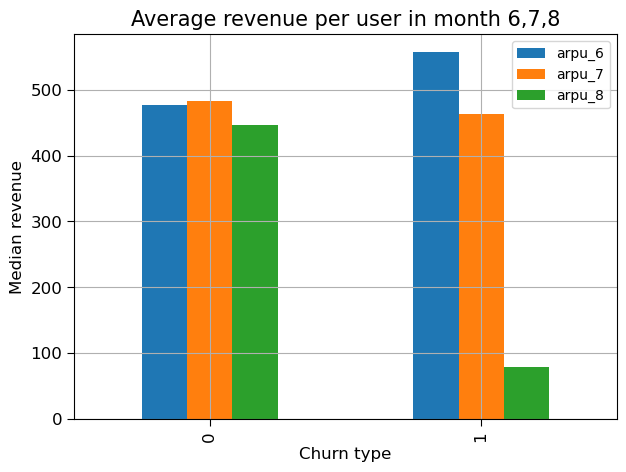

In [58]:
# Plot to visualize average revenue per user

telecom_highvalue.groupby("churn")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize=[7,5])
plt.title("Average revenue per user in month 6,7,8",fontsize=15)
plt.tick_params(size=5,labelsize = 12) 
plt.ylabel("Median revenue",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**An increase in the average revenue per user in month 6 suggests that dissatisfied users are more prone to churn**

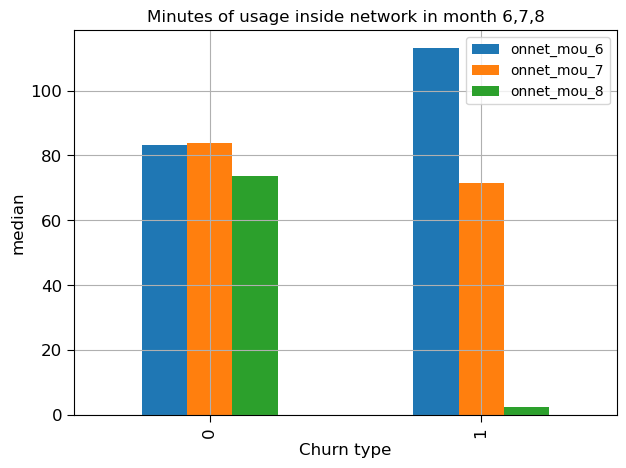

In [59]:
## Plot to visualize onnet_mou
telecom_highvalue.groupby("churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 12) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

 **Users whose minutes of usage are more in month 6, they are more likely to churn.**

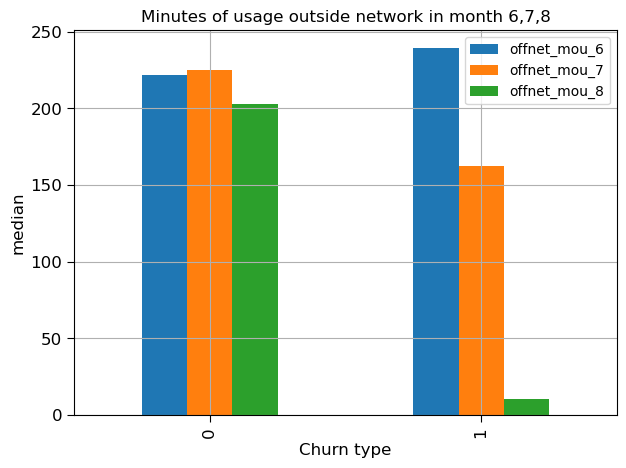

In [60]:
# Plot to visualize  offnet_mou
telecom_highvalue.groupby("churn")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 12) 
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**Users exhibiting a significant disparity in call duration to other networks between month 6 and month 7 are prone to churn.**

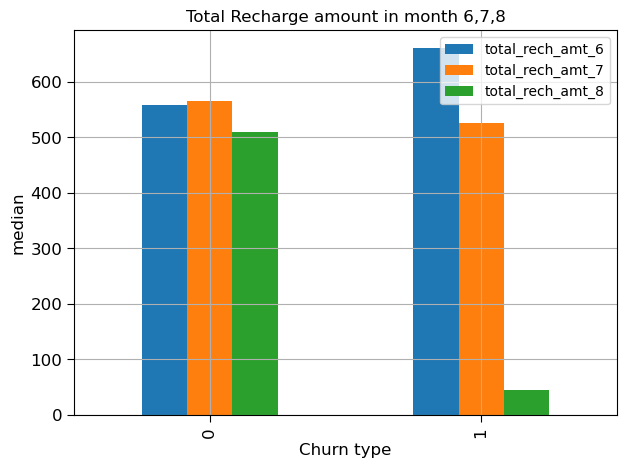

In [61]:
# Plot to visualize total_rech_amt
telecom_highvalue.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 12) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**Users are more likely to churn when there is a greater disparity in the total recharge amount**

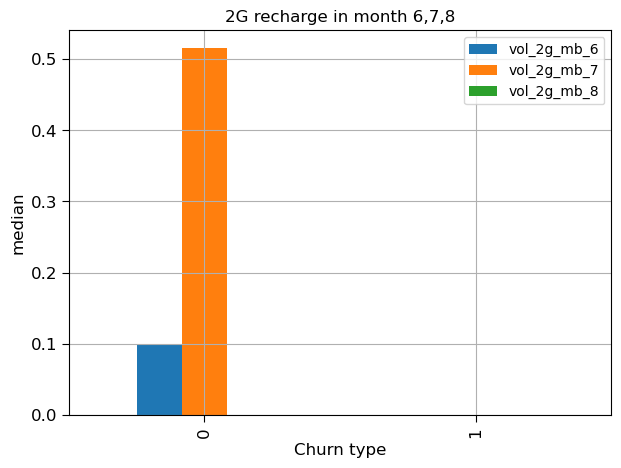

In [62]:
## Plot to visualize vol_2g_mb_6
telecom_highvalue.groupby("churn")["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8" ].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 12) 
plt.title("2G recharge in month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**The absence of 2G recharge activity does not provide conclusive evidence regarding churn behavior; the data does not offer clear indications.**

In [63]:
#Check the percenatges of churn in each category of Night Pack Users in month 8
pd.crosstab(telecom_highvalue.churn, telecom_highvalue.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [64]:
#Check the percenatges of churn in each category of Facebook Users in month 6
(pd.crosstab(telecom_highvalue.churn, telecom_highvalue.fb_user_8, normalize='columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


- In month 8, users with night packs, whose usage status is uncertain, exhibit a high churn rate of approximately 14%.
- Among users engaging with Facebook in month 8, the churn rate is approximately 2%.
- Users not utilizing Facebook experience a churn rate of close to 7% in month 8.

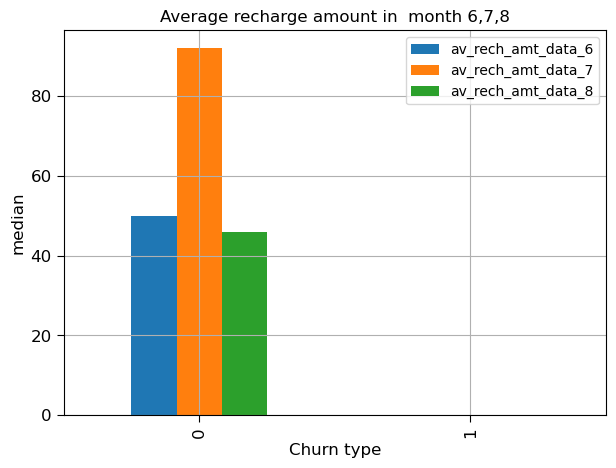

In [65]:
#Plot to visualize av_rech_amt_data
telecom_highvalue.groupby("churn")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.\
bar(figsize=[7,5])

plt.tick_params(size=5,labelsize = 12) 
plt.title("Average recharge amount in  month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**The average recharge amount for months 6, 7, and 8 is missing in the dataset, so there is a higher likelihood of churn among these users.**

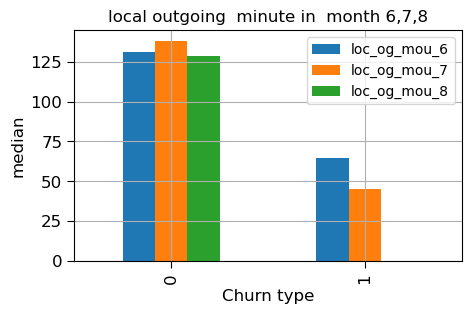

In [66]:
#Plot to visualize loc_og_mou
telecom_highvalue.groupby("churn")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[5,3])
plt.tick_params(size=5,labelsize = 12) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**Users with minimal local outgoing minutes are more prone to churn.**

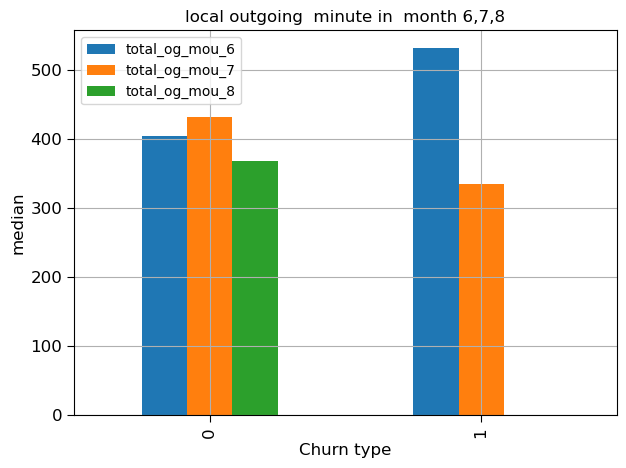

In [67]:
# total_og_mou_6
telecom_highvalue.groupby("churn")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize=[7,5])
plt.tick_params(size=5,labelsize = 12) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**Users are more likely to churn if there is a significant disparity in total outgoing minute usage between month 6 and month 7.**

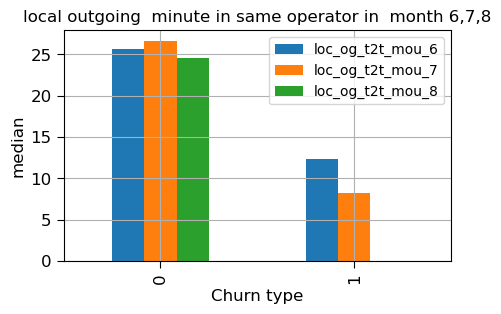

In [68]:
# loc_og_t2t_mou_6
telecom_highvalue.groupby("churn")["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"].median().plot.bar(figsize=[5,3])
plt.tick_params(size=5,labelsize = 12) 
plt.title("local outgoing  minute in same operator in  month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**Users are more inclined to churn if their local outgoing minutes within the same operator are lower in months 6, 7, and 8.**

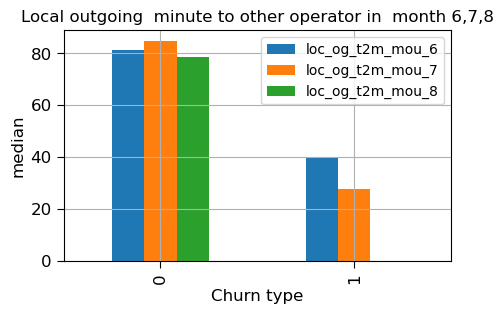

In [69]:
# loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8
telecom_highvalue.groupby("churn")["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"].median().plot.bar(figsize=[5,3])
plt.tick_params(size=5,labelsize = 12) 
plt.title("Local outgoing  minute to other operator in  month 6,7,8",fontsize=12)
plt.ylabel("median",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.grid(0.3)
plt.show()

**A reduced amount of local outgoing minutes to other operators indicates a higher likelihood of churn.**

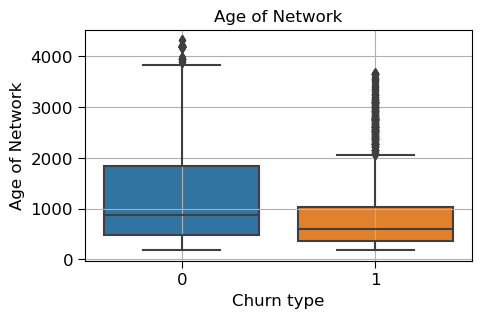

In [70]:
plt.figure(figsize=[5,3])
sns.boxplot(data=telecom_highvalue,x="churn",y="aon")
plt.tick_params(size=5,labelsize = 12) 
plt.title("Age of Network",fontsize=12)
plt.xlabel("Churn type",fontsize=12)
plt.ylabel("Age of Network",fontsize=12)
plt.grid(0.3)
plt.show()

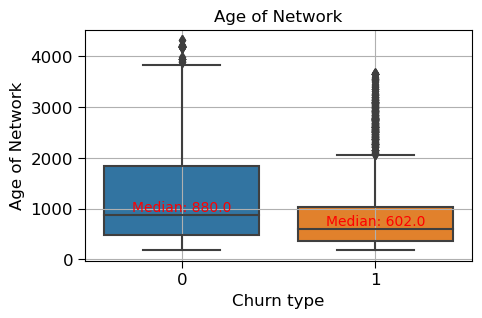

In [71]:
plt.figure(figsize=[5,3])
sns.boxplot(data=telecom_highvalue, x="churn", y="aon")
plt.tick_params(size=5, labelsize=12)
plt.title("Age of Network", fontsize=12)
plt.xlabel("Churn type", fontsize=12)
plt.ylabel("Age of Network", fontsize=12)
plt.grid(0.3)

# Calculate median value for each churn group
medians = telecom_highvalue.groupby('churn')['aon'].median()
for i in range(len(medians)):
    plt.text(i, medians[i], f'Median: {medians[i]}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')

plt.show()

**A lower median Age of network suggests a higher likelihood of churn**

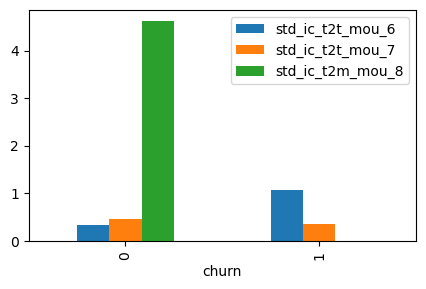

In [72]:
telecom_highvalue.groupby("churn")["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"].median().plot.bar(figsize=[5,3])
plt.show()

**Users who engage in a higher volume of STD calls are at a greater risk of churning.**

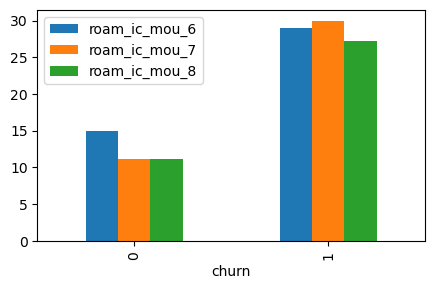

In [73]:
telecom_highvalue.groupby("churn")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar(figsize=[5,3])
plt.show()

**A higher volume of incoming roaming minutes correlates with a higher likelihood of churning.**

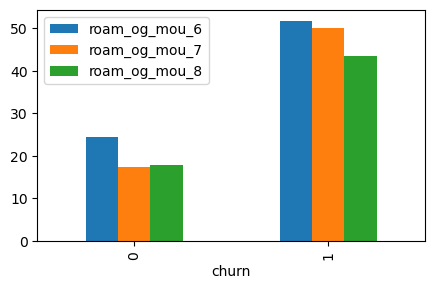

In [74]:
telecom_highvalue.groupby("churn")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar(figsize=[5,3])
plt.show()

**Users are more prone to churn when there is an increase in outgoing roaming minutes.**

In [75]:
telecom_highvalue.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,-0.105,-163.510,2.0,2453.0,395.0,0.0,0.0,0.0,0.000,0.000
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0.000,-49.635,-6.0,-399.0,-92.0,2.0,-54.0,-19.5,-177.970,-363.535
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0.000,91.550,3.0,78.0,0.0,0.0,0.0,0.0,0.000,0.000
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,0.000,127.095,0.0,212.0,89.5,1.0,89.5,92.0,-0.230,710.375


## <font color = blue > <span style='font-family:Georgia'> Step 3: Model Building

In [76]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

### Train test split of data

In [77]:
#Peform the train test split 
train,test = train_test_split(telecom_highvalue,test_size=0.2,random_state=48)

In [78]:
# check the training and testing data shape
print(f"train data shape:{train.shape}")
print(f"Test data shape:{test.shape}")

train data shape:(24000, 164)
Test data shape:(6001, 164)


In [79]:
#Convert categorical data to numeric columns by aggregation.
categorical_columns = ["night_pck_user_6","night_pck_user_7",
                       "night_pck_user_8","fb_user_6",          
                       "fb_user_8","fb_user_7"]  

In [80]:
train[categorical_columns].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_8,fb_user_7
33114,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4101,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
40361,0.0,0.0,0.0,1.0,1.0,1.0
11213,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14484,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [81]:
#Calculate categorical features mean and replace those with categorical value
print(train.groupby('night_pck_user_6')["churn"].mean())
print(train.groupby('night_pck_user_7')["churn"].mean())
print(train.groupby('night_pck_user_8')["churn"].mean())
print(train.groupby('fb_user_6')["churn"].mean())
print(train.groupby('fb_user_7')["churn"].mean())
print(train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.099621
 0.0    0.066717
 1.0    0.098462
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.116741
 0.0    0.054784
 1.0    0.058020
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141980
 0.0    0.028647
 1.0    0.019084
Name: churn, dtype: float64
fb_user_6
-1.0    0.099621
 0.0    0.083333
 1.0    0.066233
Name: churn, dtype: float64
fb_user_7
-1.0    0.116741
 0.0    0.065279
 1.0    0.053977
Name: churn, dtype: float64
fb_user_8
-1.0    0.141980
 0.0    0.067373
 1.0    0.023955
Name: churn, dtype: float64


In [82]:
#Map each categorical value with mean value
mapping = {'night_pck_user_6' : {-1: 0.099621, 0: 0.066717, 1: 0.098462},
           'night_pck_user_7' : {-1: 0.116741, 0: 0.054784, 1: 0.058020},
           'night_pck_user_8' : {-1: 0.141980, 0: 0.028647, 1: 0.019084},
           'fb_user_6'        : {-1: 0.099621, 0: 0.083333, 1: 0.066233},
           'fb_user_7'        : {-1: 0.116741, 0: 0.065279, 1: 0.053977},
           'fb_user_8'        : {-1: 0.141980, 0: 0.067373, 1: 0.023955}}

#convert categorical to Numeric features by aggregation and replace in train data
train.replace(mapping, inplace = True)
#replace the same in test data
test.replace(mapping, inplace = True)

In [83]:
# segregate  X_train and y_train 
y_train = train.pop("churn")
X_train = train

In [84]:
# Segregate X_test and y_test
y_test = test.pop("churn")
X_test = test

### <font color = blue > <span style='font-family:Georgia'> Step 4: Perform Oversampling with  SMOTE

**As we have imbalance data set, we will oversample only the training set data**

In [85]:
# !pip install imblearn

In [86]:
# Perform oversampling with traing data and pass both X_train and y_train to SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=48)
X_train_resample,y_train_resample = smote.fit_resample(X_train,y_train)

In [87]:
# Check the shape after Oversampling
print(f"Shape of train data after oversampling: {X_train_resample.shape}")
print(f"Value count of training target variable:\n{y_train_resample.value_counts()}")

Shape of train data after oversampling: (44082, 163)
Value count of training target variable:
1    22041
0    22041
Name: churn, dtype: int64


**The non-churn and churn data are now equally represented, achieving balance**

### Scaling
- We need to perform the scaling to feed the scaled data to PCA
- We are using minmax scaling 

In [88]:
# Import library and perform scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scale = MinMaxScaler()
temp_x_train = scale.fit_transform(X_train_resample)

#Form the dataframe after scaling
X_train_scale = pd.DataFrame(temp_x_train,columns=X_train.columns)
# Check the shape of scaled data
X_train_scale.shape

(44082, 163)

In [89]:
# check the scaled train data head 
X_train_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.088949,0.079537,0.035792,0.012317,0.033941,0.010586,0.113348,0.222906,0.043536,0.0,...,0.785335,0.623545,0.605428,0.297260,0.423304,0.36747,0.520098,0.658887,0.370292,0.441836
1,0.091309,0.072997,0.044006,0.068476,0.113913,0.105521,0.029152,0.036250,0.016693,0.0,...,0.785335,0.628061,0.578288,0.322196,0.439305,0.36747,0.520098,0.658887,0.370292,0.441836
2,0.078872,0.071509,0.059257,0.000655,0.005340,0.010668,0.008990,0.069703,0.051038,0.0,...,0.785335,0.638198,0.638831,0.368969,0.455306,0.39759,0.603227,0.750354,0.370801,0.509428
3,0.092193,0.064149,0.038217,0.001225,0.001190,0.004448,0.083064,0.034989,0.040130,0.0,...,0.785335,0.623763,0.594990,0.326563,0.442796,0.36747,0.520098,0.658887,0.370292,0.441836
4,0.091403,0.067002,0.036085,0.018706,0.009548,0.013353,0.046217,0.029105,0.022605,0.0,...,0.785335,0.611482,0.613779,0.325014,0.439450,0.36747,0.520098,0.658887,0.370292,0.441836


In [90]:
# Perform the scaling on test set
temp_x_test = scale.transform(X_test)
# form the test set dataframe after scaling
X_test_scale = pd.DataFrame(temp_x_test,columns=X_test.columns)

In [91]:
# check the scaled test data head 
X_test_scale.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.090964,0.075823,0.042129,0.008711,0.010712,0.026989,0.148318,0.286030,0.107864,0.000000,...,0.777376,0.619594,0.601253,0.315762,0.437850,0.367470,0.520098,0.658887,0.370292,0.441836
1,0.091021,0.069884,0.037593,0.000381,0.001873,0.001295,0.039266,0.039306,0.027770,0.027926,...,0.785335,0.630163,0.601253,0.319096,0.439305,0.367470,0.520098,0.658887,0.370292,0.441836
2,0.092684,0.072383,0.052856,0.021061,0.011957,0.025669,0.041658,0.054902,0.035280,0.000000,...,0.785335,0.633947,0.617954,0.343892,0.457051,0.379518,0.657916,0.706510,0.372878,0.465072
3,0.088568,0.066635,0.040310,0.068338,0.055077,0.016024,0.016731,0.031553,0.036182,0.000000,...,0.785335,0.622551,0.624217,0.329780,0.440032,0.367470,0.520098,0.658887,0.370292,0.441836
4,0.084756,0.055982,0.027394,0.000000,0.000000,0.000000,0.009412,0.002223,0.000000,0.000000,...,0.785335,0.587134,0.590814,0.316866,0.417703,0.289157,0.444353,0.608807,0.305042,0.441836


**Use X_train_scale and X_test_scale in PCA**

### <font color = blue > <span style='font-family:Georgia'> Step 5: PCA

- we have almost 140 features to train the model
- to remove collinearity and faster training we can perform dimensionality reduction technique PCA.

In [92]:
# Load the library
from sklearn.decomposition import PCA
pc_class = PCA(random_state=60)
X_train_pca = pc_class.fit(X_train_scale)

In [93]:
# Check the explained_variance_ratio_ whihc tells us individual principal component variance.
X_train_pca.explained_variance_ratio_

array([6.03828617e-01, 1.40973413e-01, 9.91155206e-02, 3.07631658e-02,
       1.86234669e-02, 1.18416165e-02, 9.48517523e-03, 8.28397598e-03,
       6.72748174e-03, 6.66714826e-03, 6.48765005e-03, 4.03245946e-03,
       3.54239498e-03, 3.02625956e-03, 2.62601134e-03, 2.36736548e-03,
       2.22188138e-03, 2.11335787e-03, 2.04027551e-03, 1.85954948e-03,
       1.80479200e-03, 1.69169327e-03, 1.44245222e-03, 1.39627736e-03,
       1.38652402e-03, 1.32326350e-03, 1.20520271e-03, 1.16539268e-03,
       1.09180753e-03, 9.87446077e-04, 9.32626988e-04, 8.50296303e-04,
       8.22568575e-04, 8.09298469e-04, 7.93824971e-04, 7.32863836e-04,
       7.15982444e-04, 6.64938130e-04, 6.26470521e-04, 6.16430322e-04,
       5.83678714e-04, 5.55821255e-04, 5.11635457e-04, 4.75816882e-04,
       4.69430576e-04, 4.39348363e-04, 4.29142579e-04, 4.02705885e-04,
       3.62016817e-04, 3.53569223e-04, 3.44779423e-04, 3.28864327e-04,
       3.16730775e-04, 3.00533635e-04, 2.84082281e-04, 2.80172818e-04,
      

In [94]:
# perform the cumulaltive sum of explained variance
var_cumu = np.cumsum(X_train_pca.explained_variance_ratio_)
#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"variance":var_cumu}) 
var_cumu_df.head(30) 

,variance
0,0.603829
1,0.744802
2,0.843918
3,0.874681
4,0.893304
5,0.905146
6,0.914631
7,0.922915
8,0.929642
9,0.936310


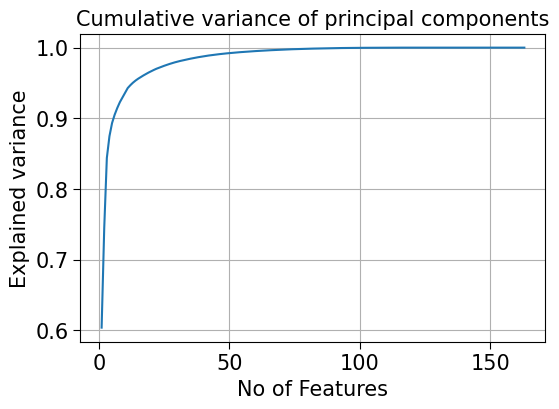

In [95]:
# Plot the cumulative explained variance : SCREE Plot
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.title("Cumulative variance of principal components",size=15)
plt.ylabel("Explained variance",size=15)
plt.xlabel("No of Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

In [96]:
# By providing variance value we can also get the suitable principal components.
pca_demo = PCA(0.96,random_state=40)
X_train_pca1 = pca_demo.fit_transform(X_train_scale)
print(f"suitable principal components for 96% of variance:{X_train_pca1.shape[1]}")

suitable principal components for 96% of variance:17


**Now we got suitable no of principal components as 17.**

**Hence we will do PCA again with 18 components for train and test set.**

In [97]:
# Instantiate PCA with 17 components 
pca_object = PCA(n_components=17,random_state=48)
# get the PCs for train data
X_train_pca_final = pca_object.fit_transform(X_train_scale)
# get the PCs for test data
X_test_pca_final = pca_object.fit_transform(X_test_scale)

#check the shape of train and test data after PCA
print(X_train_pca_final.shape)
print(X_test_pca_final.shape)

(44082, 17)
(6001, 17)


In [98]:
# Check the correlations after PCA
np.corrcoef(X_train_pca_final.transpose())

array([[ 1.00000000e+00, -1.56618196e-14,  6.56602697e-15,
         2.33071935e-15, -1.25160513e-14,  9.94192209e-15,
         3.16476595e-15,  1.79358288e-14,  6.13201789e-14,
         2.15858886e-15,  3.02485574e-14, -1.02684599e-14,
        -9.39712879e-14, -8.84488352e-14, -8.33662803e-14,
        -3.30288951e-14,  4.31285740e-13],
       [-1.56618196e-14,  1.00000000e+00,  1.42049602e-14,
        -5.74231194e-15, -4.35543693e-15,  1.51315949e-14,
        -2.90071371e-14,  2.47678296e-14,  5.29570961e-14,
        -1.69962351e-14,  1.70587737e-14, -1.40623122e-14,
        -6.39526261e-14, -5.90863615e-14, -1.02984762e-14,
        -7.33984293e-14,  2.80429788e-13],
       [ 6.56602697e-15,  1.42049602e-14,  1.00000000e+00,
         7.59588819e-15, -3.76964552e-15, -1.34799075e-14,
         1.35395843e-14, -1.81043199e-14, -6.57191995e-14,
         8.87056850e-15, -9.42178740e-15,  1.25230984e-14,
         2.77269843e-14,  4.82363249e-14, -4.96755855e-15,
         3.00838464e-14, -2.2

**The correlation values are almost close to 0( power raised to -17,-18,-19) except the diagonal.**

### <font color = blue > <span style='font-family:Georgia'> Step 6: Model Building:

    - We will explore below models.
    - Logistic regression
    - Decision tree
    - Randomforest
    - Gradientboosting
    - XGboost

In [99]:
#Function definition to check the performance of model on test data
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
# Check the performance on test set
#Precision
#recall
#f1_score
#ROC_AUC
def calculate_peformance_testdata(model_name,y_test,y_pred,pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test,y_pred)
    print(f"precision: {precision}")
    recall = metrics.recall_score(y_test,y_pred)
    print(f"recall: {recall}")
    f1_score = metrics.f1_score(y_test,y_pred)
    print(f"f1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test,pred_prob)
    print(f"roc_auc: {roc_auc}")
#     return a DataFrame with all the score
    return pd.DataFrame({"Model":[model_name],"precision":[precision],"recall":[recall],"f1_score":[f1_score],
                         "roc_auc":[roc_auc]})   

In [100]:
# Create a DataFrame which stores all test score for each model
score_df = pd.DataFrame({"Model":[None],"precision":[None],"recall":[None],"f1_score":[None],"roc_auc":[None]})

### <font color = blue > <span style='font-family:Georgia'> Step 7: Logistic regression

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#Instantiate logistic regression
lr_obj = LogisticRegression(random_state=40)
#pass PCA data as input
lr_obj.fit(X_train_pca_final, y_train_resample)
cv_score = cross_val_score(lr_obj, X_train_pca_final, y_train_resample, cv=5, scoring='f1_micro')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.8291936  0.84518544 0.84108439 0.83802178 0.8396098 ]


In [102]:
#Prediction on  pca testdata
y_pred_lr = lr_obj.predict(X_test_pca_final)
#check predict probability on pca data
pred_prob = lr_obj.predict_proba(X_test_pca_final)

In [103]:
#check various scores on test data
df1 = calculate_peformance_testdata("LogisticRegression",y_test,y_pred_lr,pred_prob[:,1])

LogisticRegression:
precision: 0.15490737091052423
recall: 0.8153526970954357
f1_score: 0.2603511096389533
roc_auc: 0.7669187318948724


In [104]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = score_df.append(df1)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919


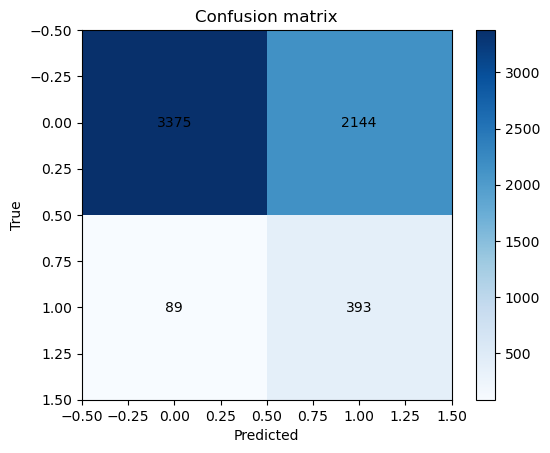

In [106]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_obj.predict(X_test_pca_final))

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add numbers to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center')

plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [107]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919


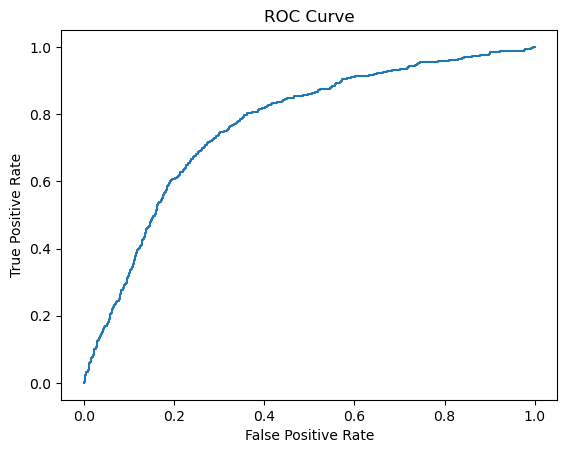

In [108]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr_obj.predict_proba(X_test_pca_final)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# <font color = blue > <span style='font-family:Georgia'> DecisionTree

X_train_resample,y_train_resample

In [109]:
from sklearn.tree import DecisionTreeClassifier
#Instantiate Decision tree with defautl parameter
dt_obj=  DecisionTreeClassifier(random_state=40)

# here we have used data generated by SMOTE. 
dt_obj.fit(X_train_scale, y_train_resample)
cv_score = cross_val_score(dt_obj, X_train_scale, y_train_resample, cv=5, scoring='f1_micro')
print(cv_score)

[0.88125213 0.92491777 0.92343466 0.93160163 0.93216878]


In [110]:
#check the default paramters 
dt_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

In [111]:
#Perform hyperparamter tuning with randomizedsearchcv
param_grid = dict({"max_leaf_nodes":[4,5,6],"min_samples_leaf":[3,4,5],'min_samples_split':[3,4,5]})
dt_clf = DecisionTreeClassifier(random_state=40)
dt_clf_rcv = RandomizedSearchCV(dt_clf,param_grid,cv=5,scoring="f1_micro")# n_jobs=-1
dt_clf_rcv.fit(X_train_scale, y_train_resample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [112]:
#check the beat score and best estimator paramters
print(dt_clf_rcv.best_score_)
print(dt_clf_rcv.best_estimator_)

0.8546802785906701
DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=5,
                       min_samples_split=5, random_state=40)


In [113]:
#Train the decision tree with best paramters obtained from above step
# Commented out the hyperparamter tuning as it takes sometime to execute
dt_clf = DecisionTreeClassifier(max_leaf_nodes=6,min_samples_leaf=4,min_samples_split=5,random_state=40)
dt_clf.fit(X_train_scale,y_train_resample)

DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=4,
                       min_samples_split=5, random_state=40)

In [114]:
#perform the prediction 
y_pred_dt = dt_clf.predict(X_test_scale)
#Perform the prediction probability
pred_prob = dt_clf.predict_proba(X_test_scale)

In [115]:
##check the scores.
df2 = calculate_peformance_testdata("DecisionTree",y_test,y_pred_dt,pred_prob[:,1])

DecisionTree:
precision: 0.33690360272638753
recall: 0.7178423236514523
f1_score: 0.4585818422796554
roc_auc: 0.8510624180969703


In [116]:
#Add the score to Dataframe  for comparision 
score_df = score_df.append(df2)
score_df.dropna(inplace=True)
score_df.drop_duplicates(inplace=True)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919
0,DecisionTree,0.336904,0.717842,0.458582,0.851062


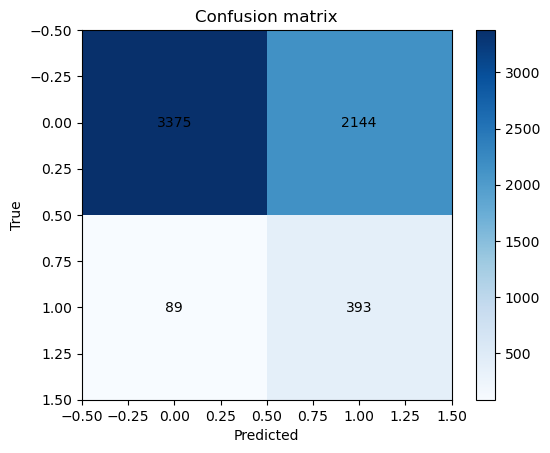

In [117]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_obj.predict(X_test_pca_final))

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add numbers to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center')

plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

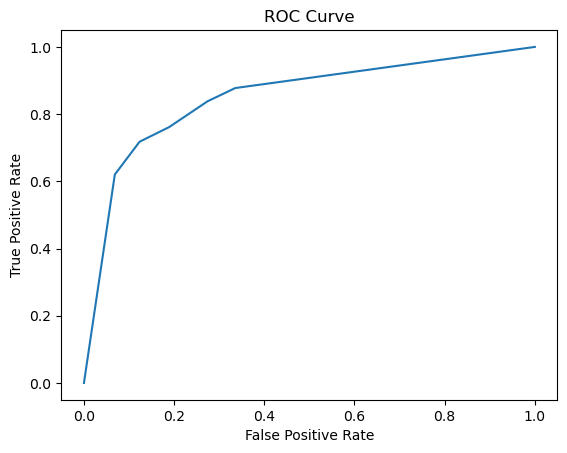

In [120]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, dt_clf.predict_proba(X_test_scale)[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# <font color = blue > <span style='font-family:Georgia'> Randomforest

In [121]:
#Instantiate RandomForest, train with default parameters
rf_class = RandomForestClassifier(n_jobs=-1) #class_weight={0:1,1:2}
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [122]:
#check the default parameters
rf_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [123]:
#Use best paramters to train the model
rf_class = RandomForestClassifier(min_samples_leaf=3,n_estimators=120,n_jobs=-1,random_state=40)
rf_class.fit(X_train_scale,y_train_resample)
y_pred_rf = rf_class.predict(X_test_scale)
pred_prob = rf_class.predict_proba(X_test_scale)

In [124]:
#check the scores 
df3 = calculate_peformance_testdata("RandomForest",y_test,y_pred_rf,pred_prob[:,1])

RandomForest:
precision: 0.5862708719851577
recall: 0.6556016597510373
f1_score: 0.6190009794319294
roc_auc: 0.9244024227132372


In [125]:
#Add score to the dataframe for comparision 
score_df = score_df.append(df3)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402


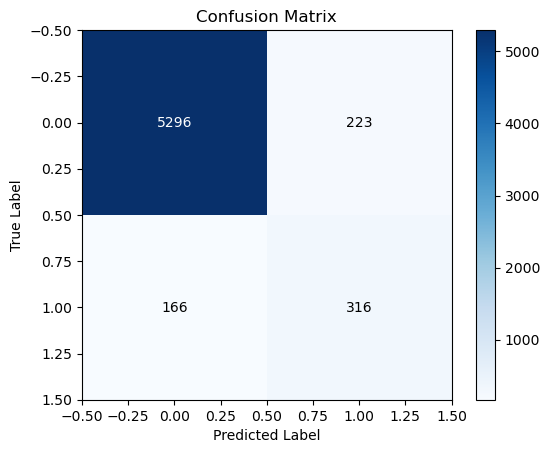

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_class.predict(X_test_scale))

# Plot confusion matrix with annotations
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()

# Add annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

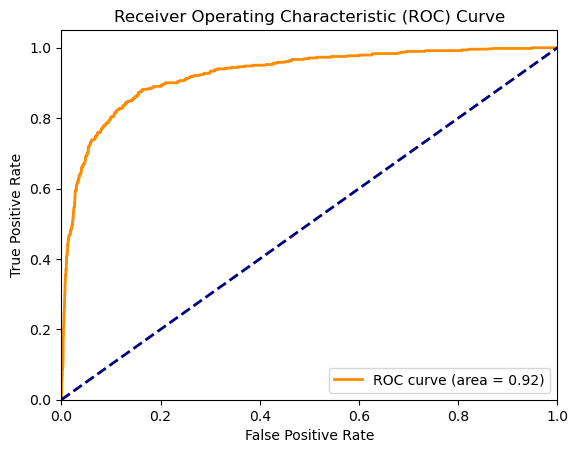

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_class.predict_proba(X_test_scale)[:, 1])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# <font color = blue > <span style='font-family:Georgia'> GradientBoosting

In [133]:
#Train gradient boosting with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_class = GradientBoostingClassifier(random_state=42,min_samples_leaf=4,min_samples_split=5)
# n_estimators=110,min_samples_leaf=2,min_samples_split=3,learning_rate=0.2
gb_class.fit(X_train_scale,y_train_resample)

#get the predicated label
y_pred_gb = gb_class.predict(X_test_scale)
#get the predicted probability
pred_prob = gb_class.predict_proba(X_test_scale)

In [134]:
#check the training default parameters
gb_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [135]:
#Check the test scores
df4 = calculate_peformance_testdata("GradientBoosting",y_test,y_pred_gb,pred_prob[:,1])

GradientBoosting:
precision: 0.48326055312954874
recall: 0.6887966804979253
f1_score: 0.5680068434559452
roc_auc: 0.9197948016621568


In [136]:
#Add the scores to dataframe
score_df=score_df.append(df4)
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795


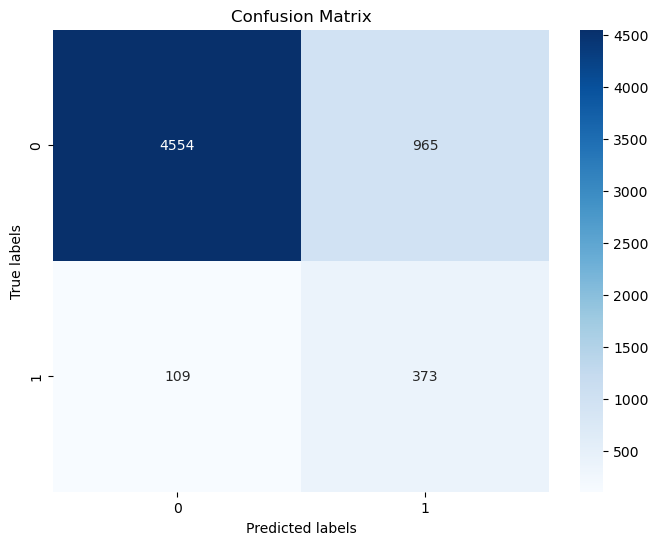

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, gb_class.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

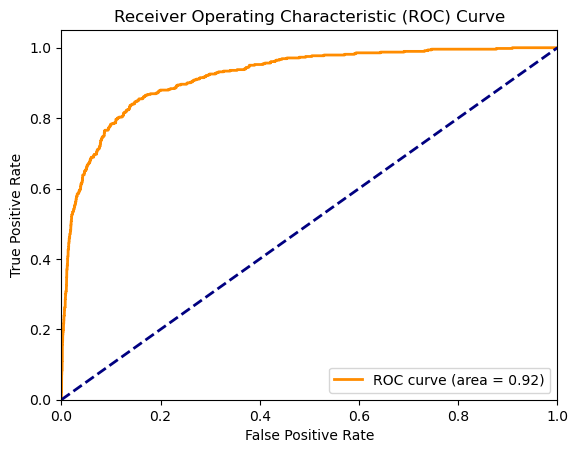

In [140]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_class.predict_proba(X_test_scale)[:, 1])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# <font color = blue > <span style='font-family:Georgia'>Xgboost

In [142]:
import xgboost as xgb

In [143]:
# Model training with default paamters

xgb_class = xgb.XGBClassifier(max_depth=10)
xgb_class.fit(X_train_scale,y_train_resample)

# Model prediction 
y_pred_xgb = xgb_class.predict(X_test_scale)
#Model predict probability
pred_prob = xgb_class.predict_proba(X_test_scale)

In [144]:
#check the model default paramters
xgb_class.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [145]:
#check the scores
df5 = calculate_peformance_testdata("XGBoost",y_test,y_pred_xgb,pred_prob[:,1])

XGBoost:
precision: 0.6560975609756098
recall: 0.558091286307054
f1_score: 0.6031390134529148
roc_auc: 0.9295804986019627


In [146]:
#add the score to dataframe
score_df= score_df.append(df5)
score_df.drop_duplicates()

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.656098,0.558091,0.603139,0.929580


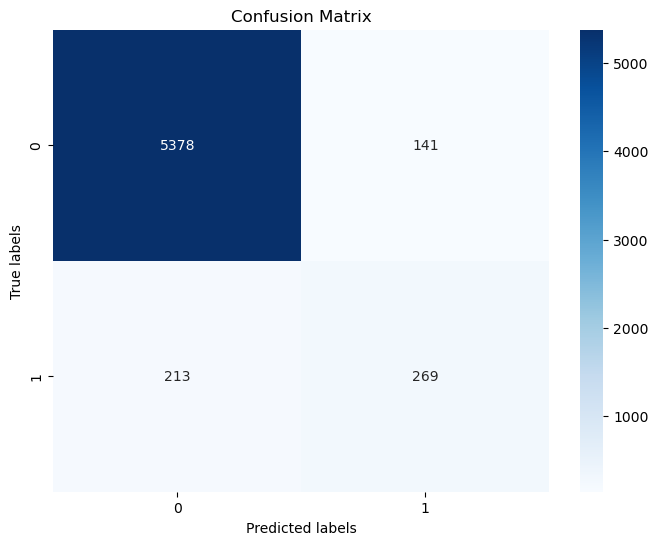

In [148]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, xgb_class.predict(X_test_scale))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

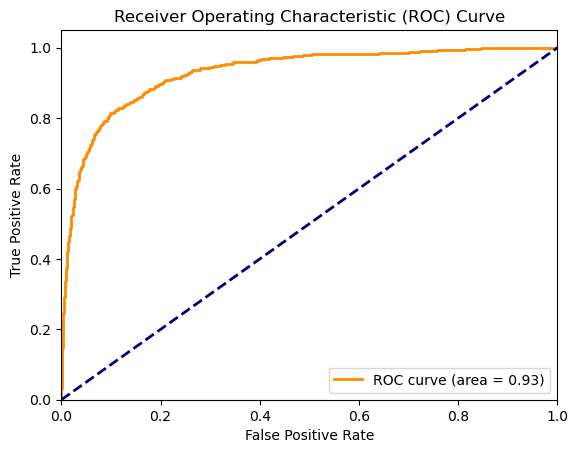

In [149]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_class.predict_proba(X_test_scale)[:, 1])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [150]:
#check how various model is performing on test set on Churn=1.
score_df

,Model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.154907,0.815353,0.260351,0.766919
0,DecisionTree,0.336904,0.717842,0.458582,0.851062
0,RandomForest,0.586271,0.655602,0.619001,0.924402
0,GradientBoosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.656098,0.558091,0.603139,0.929580


**Random Forest Performance: Random Forest achieved good results with approximately 59% precision, 65% recall, and 61%  F1 score for churn prediction.**

**Logistic Regression with PCA: Logistic Regression was used with PCA for dimensionality reduction.**

**Model Performance Comparison: Without PCA, the models performed better in this scenario.**

### <font color = blue > <span style='font-family:Georgia'>Feature Importance and Model Interpretation

In [151]:
# Randomforest model training 
gb_object = RandomForestClassifier(random_state=40)
gb_object.fit(X_train_resample,y_train_resample)
y_pred = gb_object.predict(X_test)

In [152]:
#check the performance on test data
calculate_peformance_testdata("RandomForest",y_test,y_pred,pred_prob[:,1])

RandomForest:
precision: 0.6056338028169014
recall: 0.6244813278008299
f1_score: 0.6149131767109295
roc_auc: 0.9295804986019627


,Model,precision,recall,f1_score,roc_auc
0,RandomForest,0.605634,0.624481,0.614913,0.92958


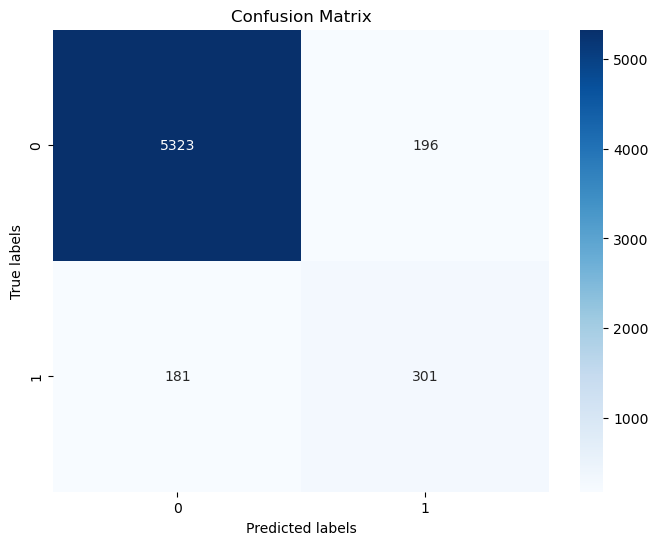

In [154]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, gb_object.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

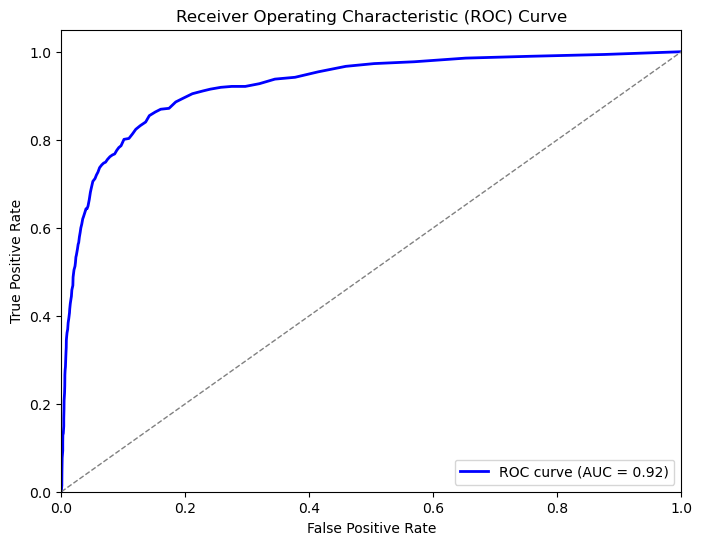

In [156]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_object.predict_proba(X_test)[:, 1])

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, gb_object.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [157]:
#check the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5519
           1       0.61      0.62      0.61       482

    accuracy                           0.94      6001
   macro avg       0.79      0.79      0.79      6001
weighted avg       0.94      0.94      0.94      6001



In [158]:
#Create a Feature importance dataframe
Feature_importance = pd.DataFrame({"columns":X_train.columns,"feature_importance":gb_object.feature_importances_})

In [159]:
#check 40 important features
fi = Feature_importance.sort_values(by="feature_importance",ascending=False).head(40)
fi

,columns,feature_importance
80,total_ic_mou_8,0.066874
95,total_rech_amt_8,0.043899
134,fb_user_8,0.038620
65,loc_ic_mou_8,0.037469
119,night_pck_user_8,0.037256
11,roam_ic_mou_8,0.035839
59,loc_ic_t2m_mou_8,0.033583
29,loc_og_mou_8,0.027910
2,arpu_8,0.027545
156,total_rech_amt_diff,0.026513


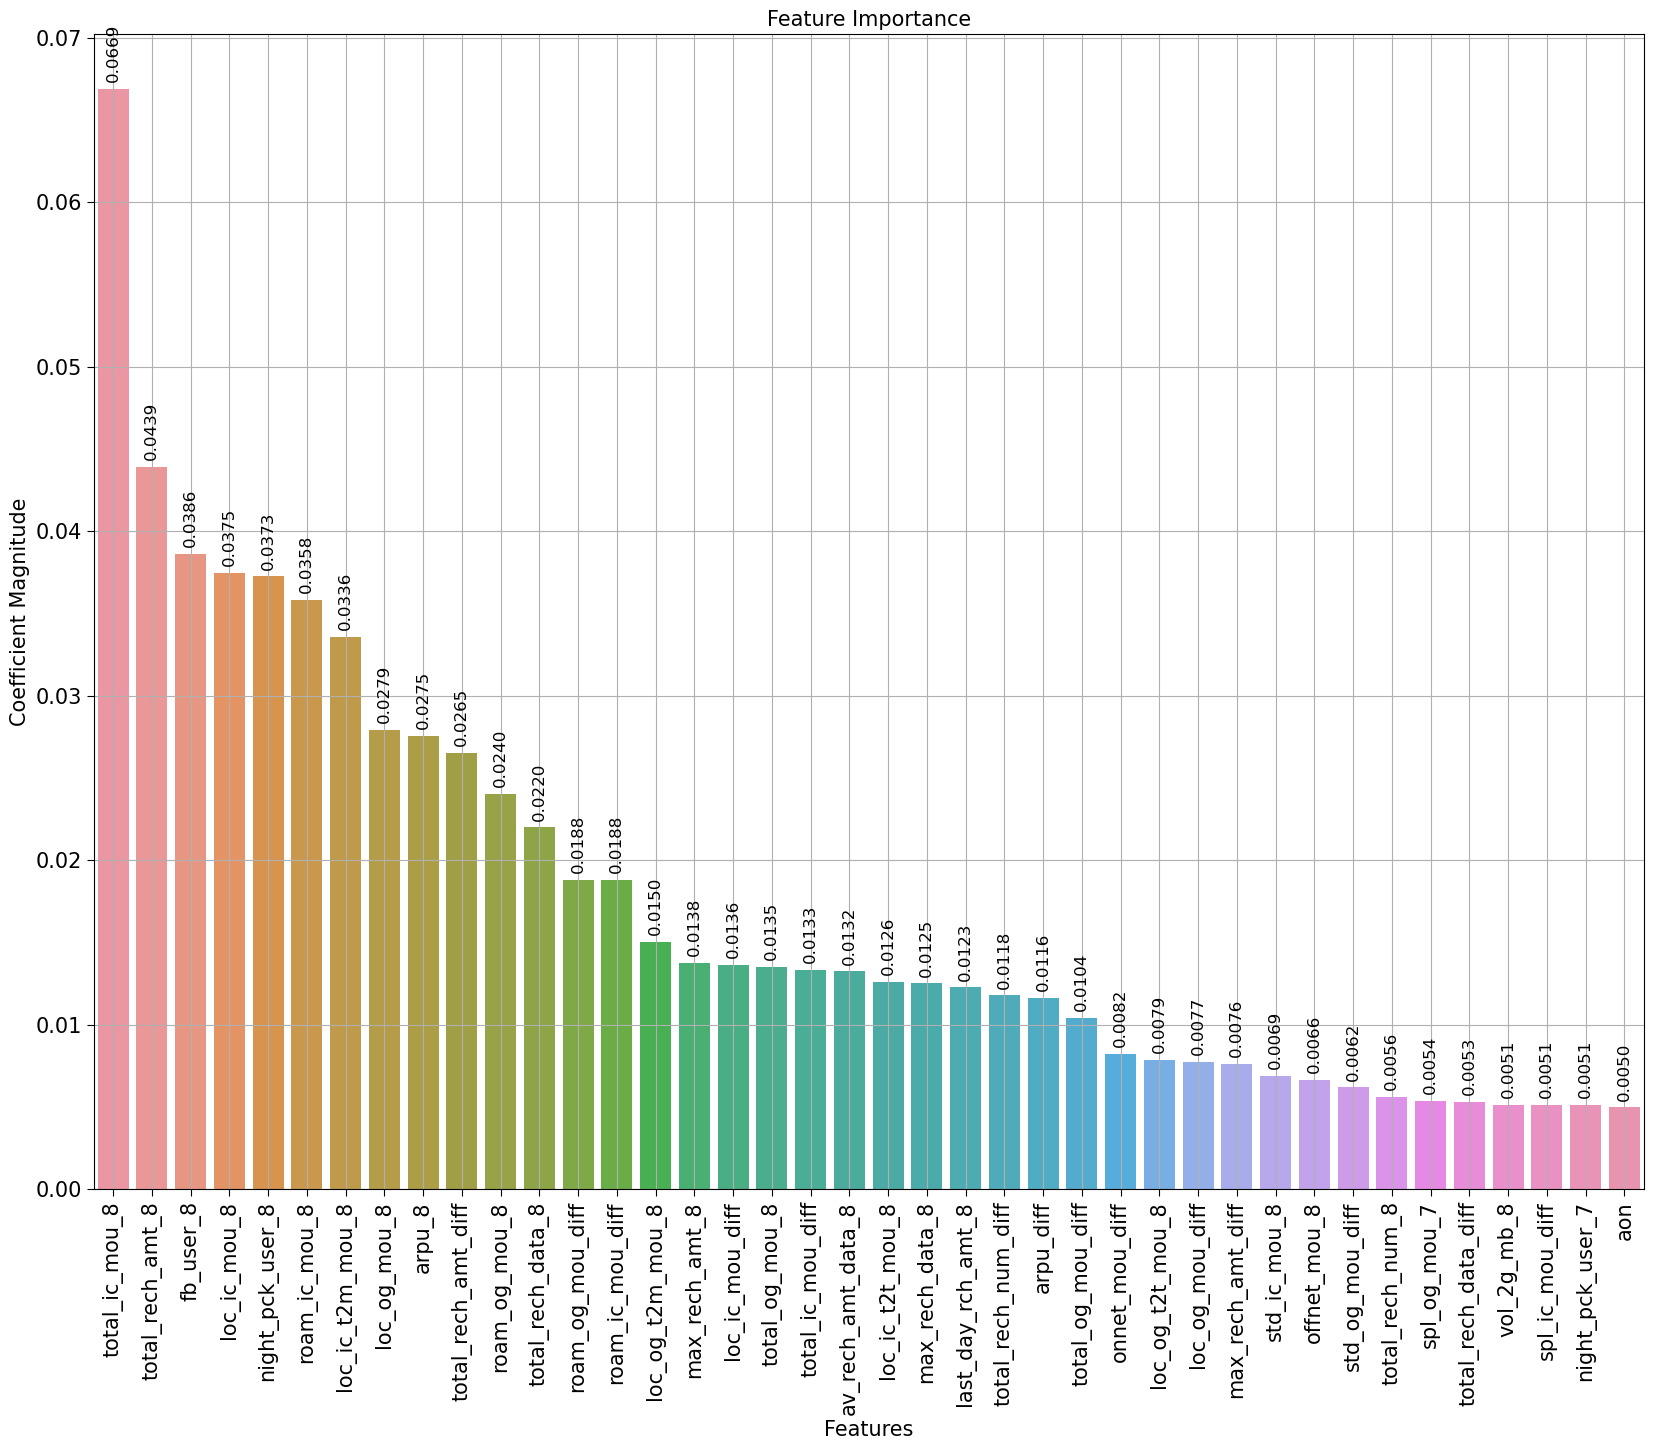

In [164]:
plt.figure(figsize=[20,15])
ax = sns.barplot(x="columns", y="feature_importance", data=fi)

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate('%.4f' % height, xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=12, rotation=90)  # Rotate the text vertically

plt.title("Feature Importance", size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Magnitude", size=15)
plt.xlabel("Features", size=15)
plt.tick_params(size=5, labelsize=15)  # Tick size in both X and Y axes
plt.grid(0.3)
plt.show()